<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://docs.unidata.ucar.edu/images/logos/unidata_logo_vertical_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

# NEXRAD Level 3 Radar
**Python-AWIPS Tutorial Notebook**

<div style="clear:both"></div>
</div>

---

<div style="float:right; width:250 px"><img src="../images/NEXRAD_Level3_Radar_preview.png" alt="NEXRAD Composite Reflectivity Example" style="height: 300px;"></div>


# Objectives

* Use python-awips to connect to an edex server
* Define and filter data request for radar data
* Plot NEXRAD 3 algorithm, precipitation, and derived products (not base data)

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#EDEX-Connection" data-toc-modified-id="EDEX-Connection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDEX Connection</a></span></li><li><span><a href="#Investigate-Data" data-toc-modified-id="Investigate-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Investigate Data</a></span><ul class="toc-item"><li><span><a href="#Available-Locations" data-toc-modified-id="Available-Locations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Available Locations</a></span></li><li><span><a href="#Available-Parameters" data-toc-modified-id="Available-Parameters-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Available Parameters</a></span></li><li><span><a href="#Radar-Product-IDs-and-Names" data-toc-modified-id="Radar-Product-IDs-and-Names-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Radar Product IDs and Names</a></span></li></ul></li><li><span><a href="#Function:-make_map()" data-toc-modified-id="Function:-make_map()-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Function: make_map()</a></span></li><li><span><a href="#Plot-the-Data!" data-toc-modified-id="Plot-the-Data!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot the Data!</a></span></li><li><span><a href="#See-Also" data-toc-modified-id="See-Also-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>See Also</a></span><ul class="toc-item"><li><span><a href="#Related-Notebooks" data-toc-modified-id="Related-Notebooks-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Related Notebooks</a></span></li><li><span><a href="#Additional-Documention" data-toc-modified-id="Additional-Documention-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Additional Documention</a></span></li></ul></li></ul></div>

## Imports

The imports below are used throughout the notebook.  Note the first import is coming directly from python-awips and allows us to connect to an EDEX server.  The subsequent imports are for data manipulation and visualization. 

In [15]:
import warnings
from awips.dataaccess import DataAccessLayer
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

<a href="#top">Top</a>

---

## EDEX Connection

First we establish a connection to Unidata's public EDEX server. This sets the proper server on the **DataAccessLayer**, which we will use numerous times throughout the notebook.

In [16]:
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest("radar")

<a href="#top">Top</a>

---

## Investigate Data

Now that we've created a new radar data request, let's take a look at what locations and parameters are available for our current request.

### Available Locations

We can take a look at what "locations" are available for our radar request.  For radar, we'll see that radar station names are returned when looking at the availalbe location names.

For this example we'll use Baltimore, MD/Washington, DC as our region of interest.  You can easily look up other station IDs and where they are using [this NWS webpage](https://radar.weather.gov/station/KMHX/standard).

In [17]:
available_locs = DataAccessLayer.getAvailableLocationNames(request)
available_locs.sort()
print(available_locs)

# Set our location to Baltimore (klwx)
request.setLocationNames("klwx")

['kabr', 'kabx', 'kakq', 'kama', 'kamx', 'kapx', 'karx', 'katx', 'kbbx', 'kbgm', 'kbhx', 'kbis', 'kblx', 'kbmx', 'kbox', 'kbro', 'kbuf', 'kbyx', 'kcae', 'kcbw', 'kcbx', 'kccx', 'kcle', 'kclx', 'kcrp', 'kcxx', 'kcys', 'kdax', 'kddc', 'kdfx', 'kdgx', 'kdix', 'kdlh', 'kdmx', 'kdox', 'kdtx', 'kdvn', 'kdyx', 'keax', 'kemx', 'kenx', 'keox', 'kepz', 'kesx', 'kevx', 'kewx', 'keyx', 'kfcx', 'kfdr', 'kfdx', 'kffc', 'kfsd', 'kfsx', 'kftg', 'kfws', 'kggw', 'kgjx', 'kgld', 'kgrb', 'kgrk', 'kgrr', 'kgsp', 'kgwx', 'kgyx', 'khdc', 'khdx', 'khgx', 'khnx', 'khpx', 'khtx', 'kict', 'kicx', 'kiln', 'kilx', 'kind', 'kinx', 'kiwa', 'kiwx', 'kjax', 'kjgx', 'kjkl', 'klbb', 'klch', 'klgx', 'klnx', 'klot', 'klrx', 'klsx', 'kltx', 'klvx', 'klwx', 'klzk', 'kmaf', 'kmax', 'kmbx', 'kmhx', 'kmkx', 'kmlb', 'kmob', 'kmpx', 'kmqt', 'kmrx', 'kmsx', 'kmtx', 'kmux', 'kmvx', 'kmxx', 'knkx', 'knqa', 'koax', 'kohx', 'kokx', 'kotx', 'kpah', 'kpbz', 'kpdt', 'kpoe', 'kpux', 'krax', 'krgx', 'kriw', 'krlx', 'krtx', 'ksfx', 'ksgf',

### Available Parameters

Next, let's look at the parameters returned from the available parameters request.  If we look closely, we can see that some of the parameters appear different from the others.

In [18]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
print(availableParms)

['134', '135', '141', '153', '154', '159', '161', '163', '165', '166', '169', '170', '172', '173', '176', '177', '197', '32', '37', '56', '57', '58', '81', '99', 'CC', 'CZ', 'Composite Refl', 'Correlation Coeff', 'DAA', 'DHR', 'DPA', 'DPR', 'DUA', 'DVL', 'Diff Reflectivity', 'Digital Hybrid Scan Refl', 'Digital Inst Precip Rate', 'Digital Precip Array', 'Digital Vert Integ Liq', 'EET', 'Enhanced Echo Tops', 'HC', 'HHC', 'HV', 'HZ', 'Hybrid Hydrometeor Class', 'Hydrometeor Class', 'KDP', 'MD', 'ML', 'Melting Layer', 'Mesocyclone', 'OHA', 'One Hour Accum', 'One Hour Unbiased Accum', 'RRC', 'Rain Rate Classification', 'Reflectivity', 'SRM', 'STA', 'STI', 'Specific Diff Phase', 'Storm Rel Velocity', 'Storm Total Accum', 'Storm Track', 'User Select Accum', 'V', 'VIL', 'Velocity', 'Vert Integ Liq', 'ZDR']


### Radar Product IDs and Names

As we saw above, some parameters seem to be describing different things from the rest.  The DataAccessLayer has a built in function to parse the available parameters into the separate **Product IDs** and **Product Names**.  Here, we take a look at the two different arrays that are returned when parsing the *availableParms* array we just recieved in the previous code cell.

In [19]:
productIDs = DataAccessLayer.getRadarProductIDs(availableParms)
productNames = DataAccessLayer.getRadarProductNames(availableParms)
print(productIDs)
print(productNames)

['134', '135', '141', '153', '154', '159', '161', '163', '165', '166', '169', '170', '172', '173', '176', '177', '197', '32', '37', '56', '57', '58', '81', '99']
['Composite Refl', 'Correlation Coeff', 'Diff Reflectivity', 'Digital Hybrid Scan Refl', 'Digital Inst Precip Rate', 'Digital Precip Array', 'Digital Vert Integ Liq', 'Enhanced Echo Tops', 'Hybrid Hydrometeor Class', 'Hydrometeor Class', 'Melting Layer', 'Mesocyclone', 'One Hour Accum', 'One Hour Unbiased Accum', 'Rain Rate Classification', 'Reflectivity', 'Specific Diff Phase', 'Storm Rel Velocity', 'Storm Total Accum', 'Storm Track', 'User Select Accum', 'Velocity', 'Vert Integ Liq']


<a href="#top">Top</a>

---

## Function: make_map()

In order to plot more than one image, it's easiest to define common logic in a function.  Here, a new function called **make_map** is defined.  This function uses the [matplotlib.pyplot package (plt)](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html) to create a figure and axis.  The coastlines (continental boundaries) are added, along with lat/lon grids.

In [20]:
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 16),
                           subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

<a href="#top">Top</a>

---

## Plot the Data!

Here we'll create a plot for each of the Radar Product Names from our *productNames* array from the [previous section](#Radar-Product-IDs-and-Names).


Recs :  1
Time : 2025-02-12 23:42:47
Name : klwx_0.0_464_464
Prod : Composite Refl
Range: 5.0  to  40.0  (Unit : dBZ )
Size : (464, 464)



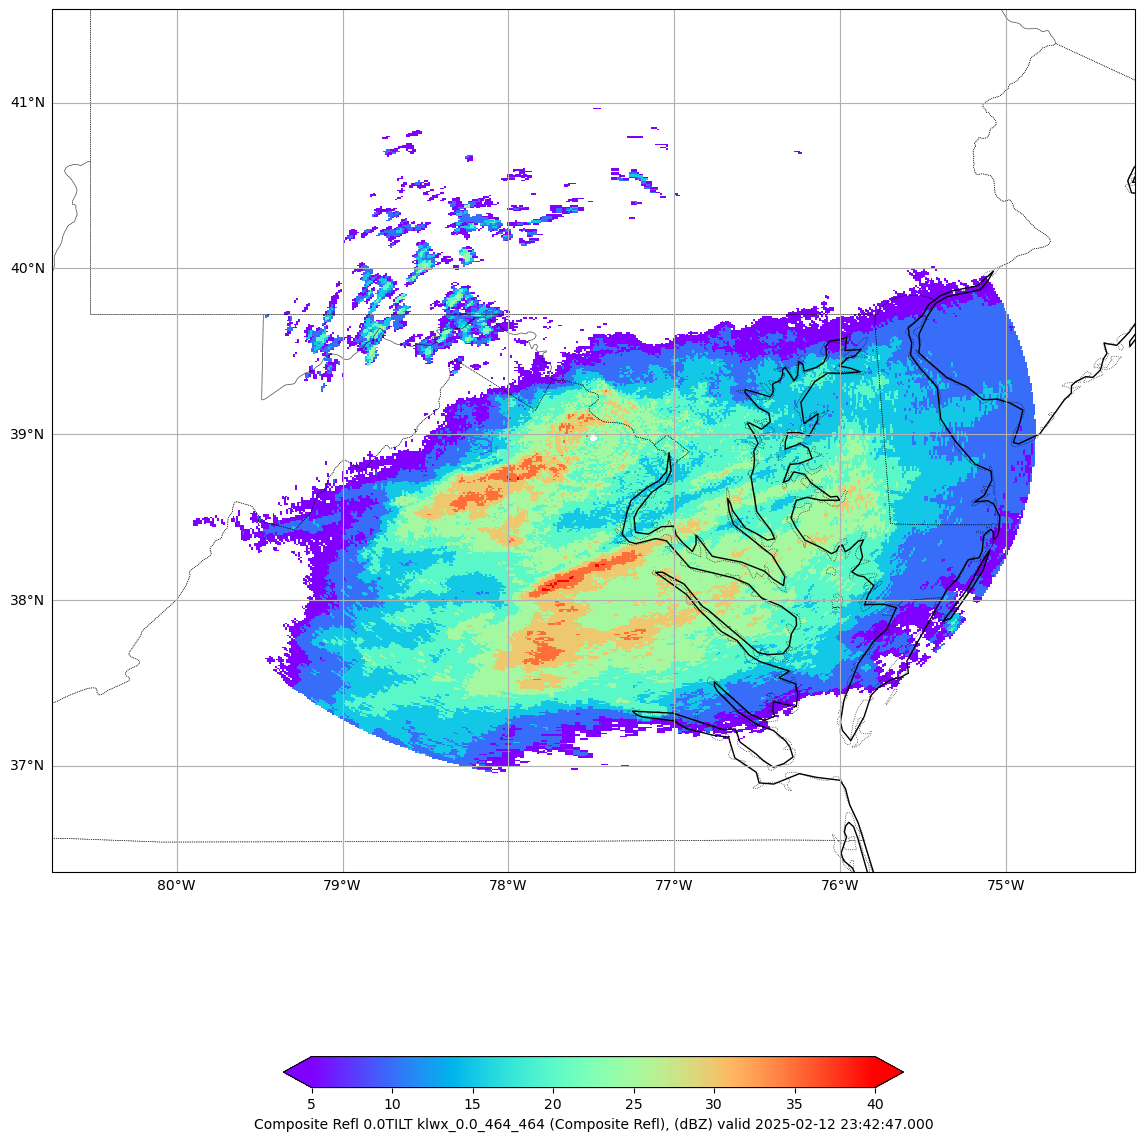

No levels found for Correlation Coeff
No levels found for Diff Reflectivity

Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_230_360_0.0_359.0
Prod : Digital Hybrid Scan Refl
Range: -29.0  to  39.5  (Unit : dBZ )
Size : (230, 360)



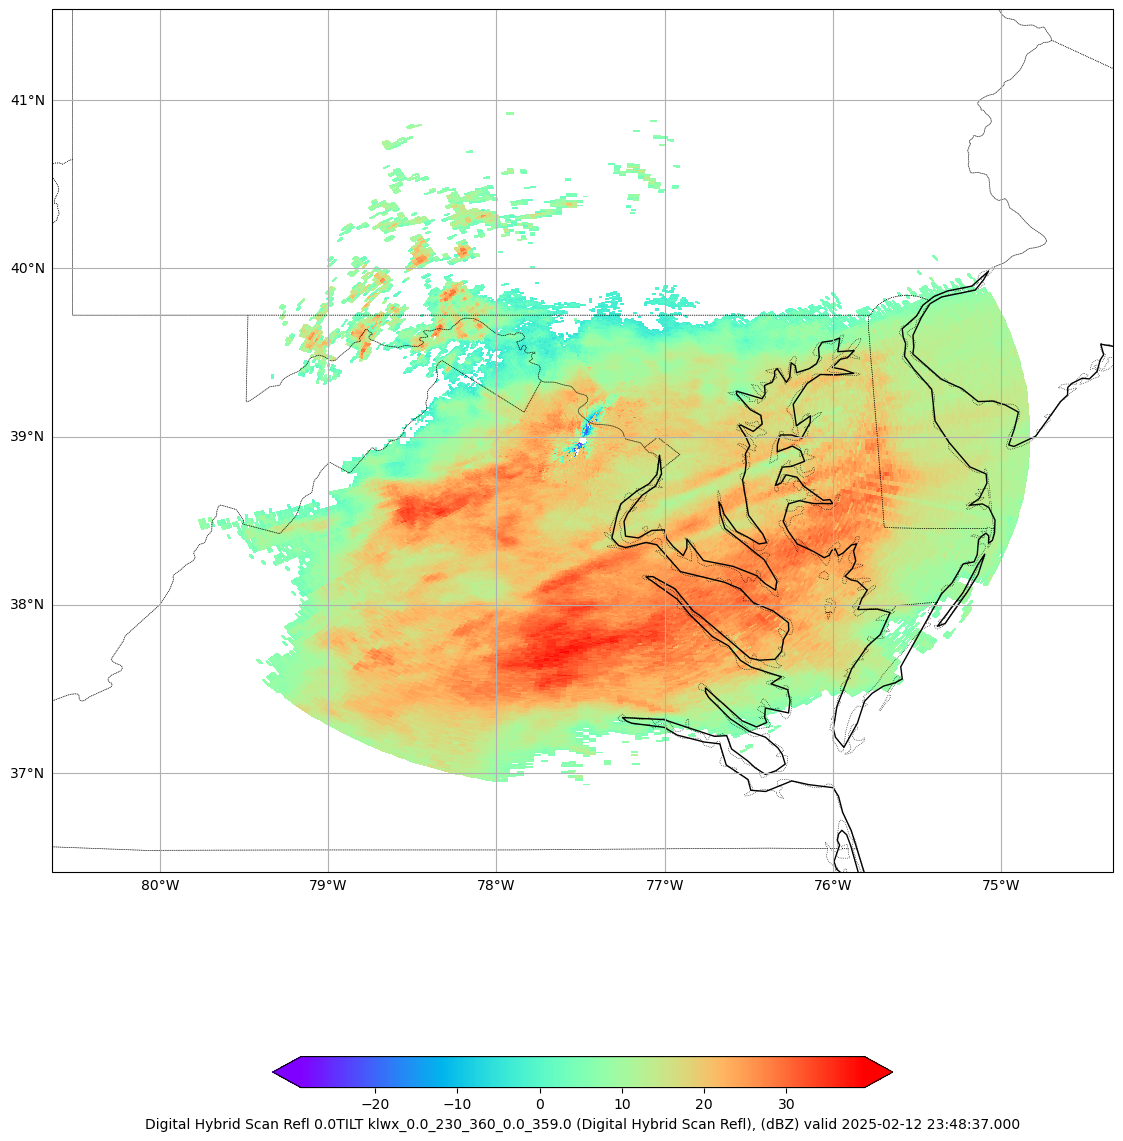


Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_920_360_0.0_359.0
Prod : Digital Inst Precip Rate
Range: 7.0555557e-09  to  2.998611e-06  (Unit : m*sec^-1 )
Size : (920, 360)



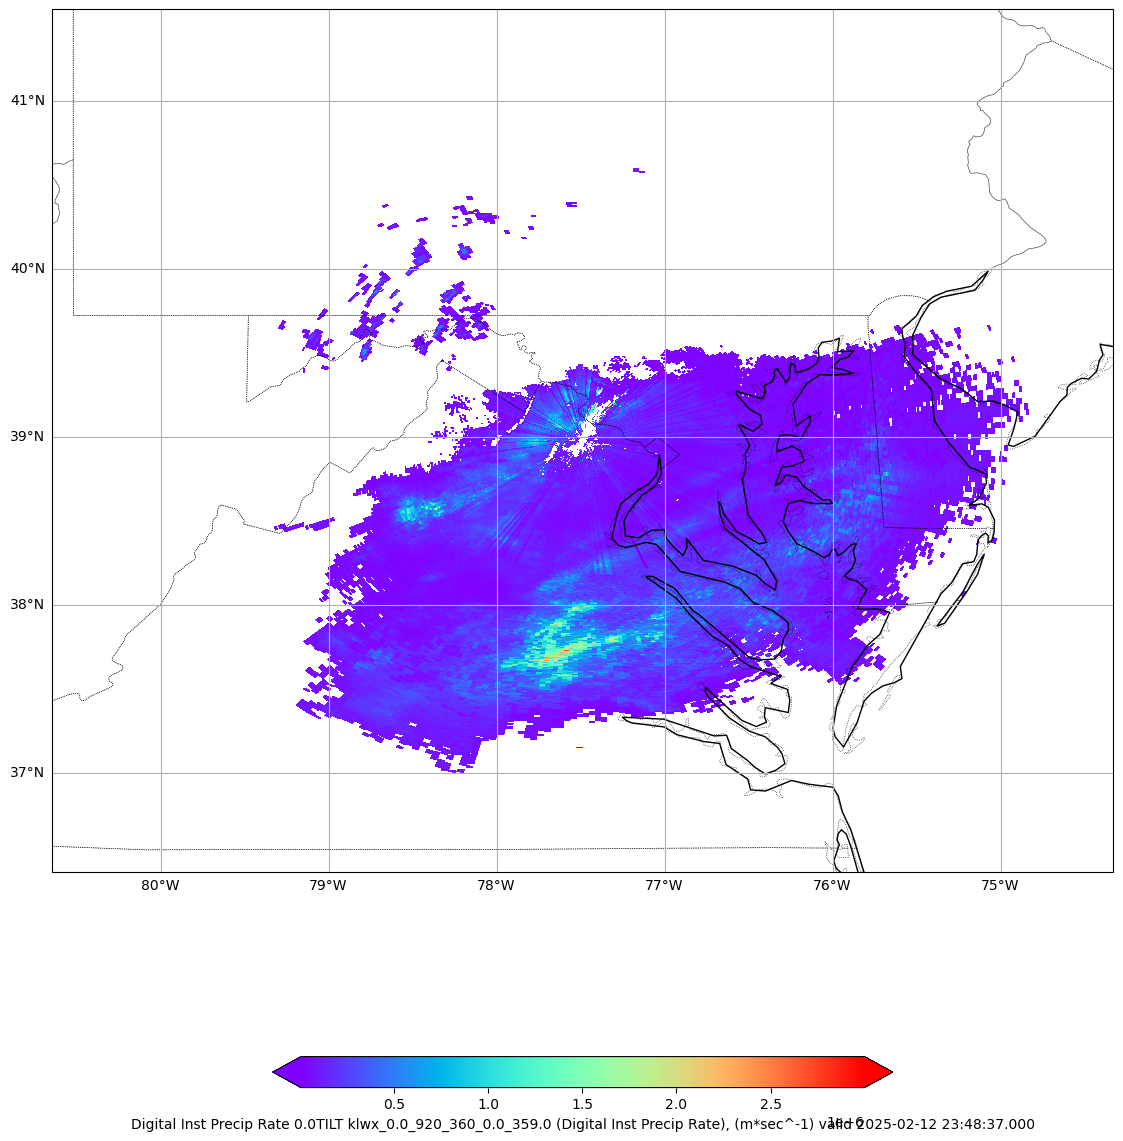


Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_13_13
Prod : Digital Precip Array
Range: -60.0  to  690.0  (Unit : count )
Size : (13, 13)



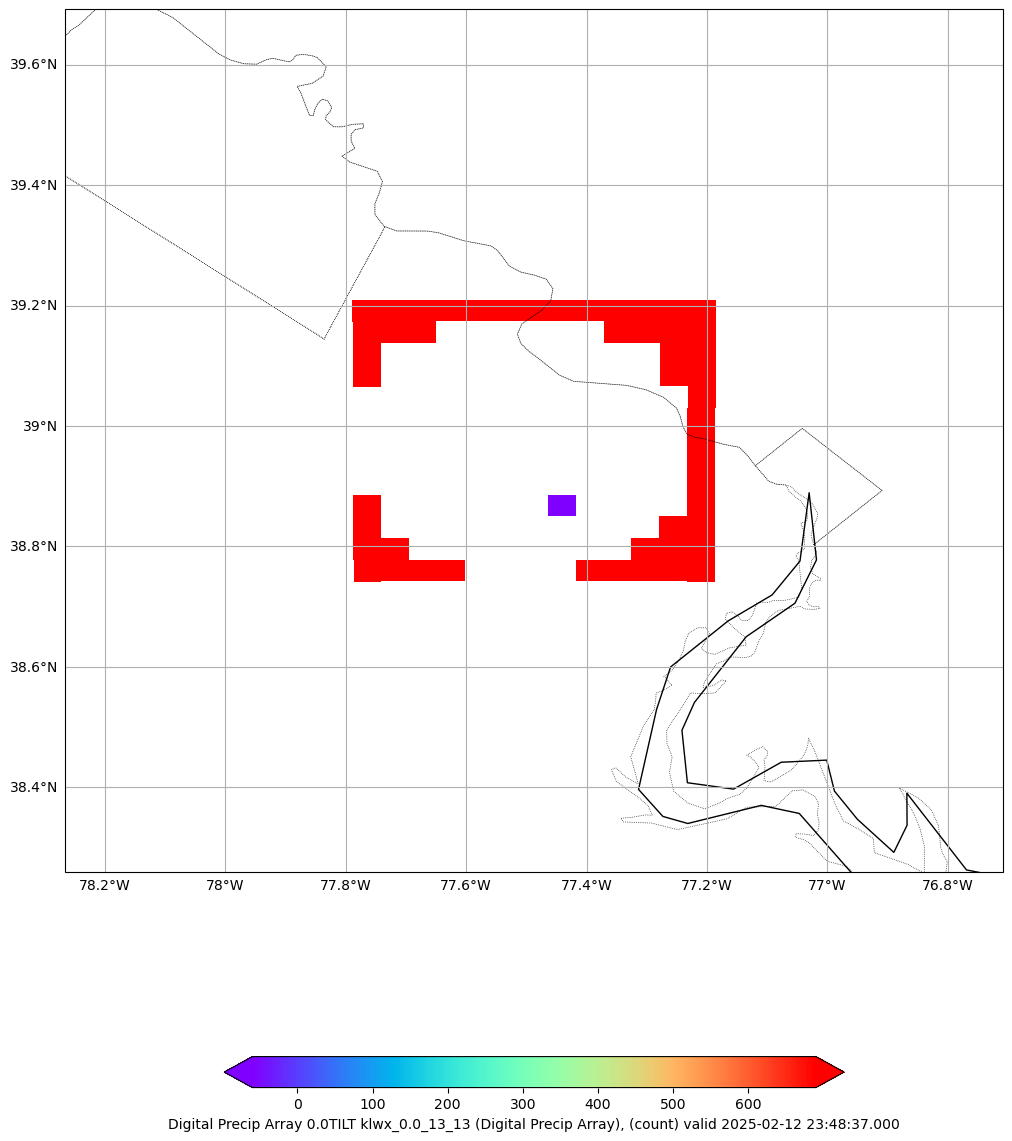


Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_460_360_0.0_359.0
Prod : Digital Vert Integ Liq
Range: 0.0  to  2.2850013  (Unit : kg*m^-2 )
Size : (460, 360)



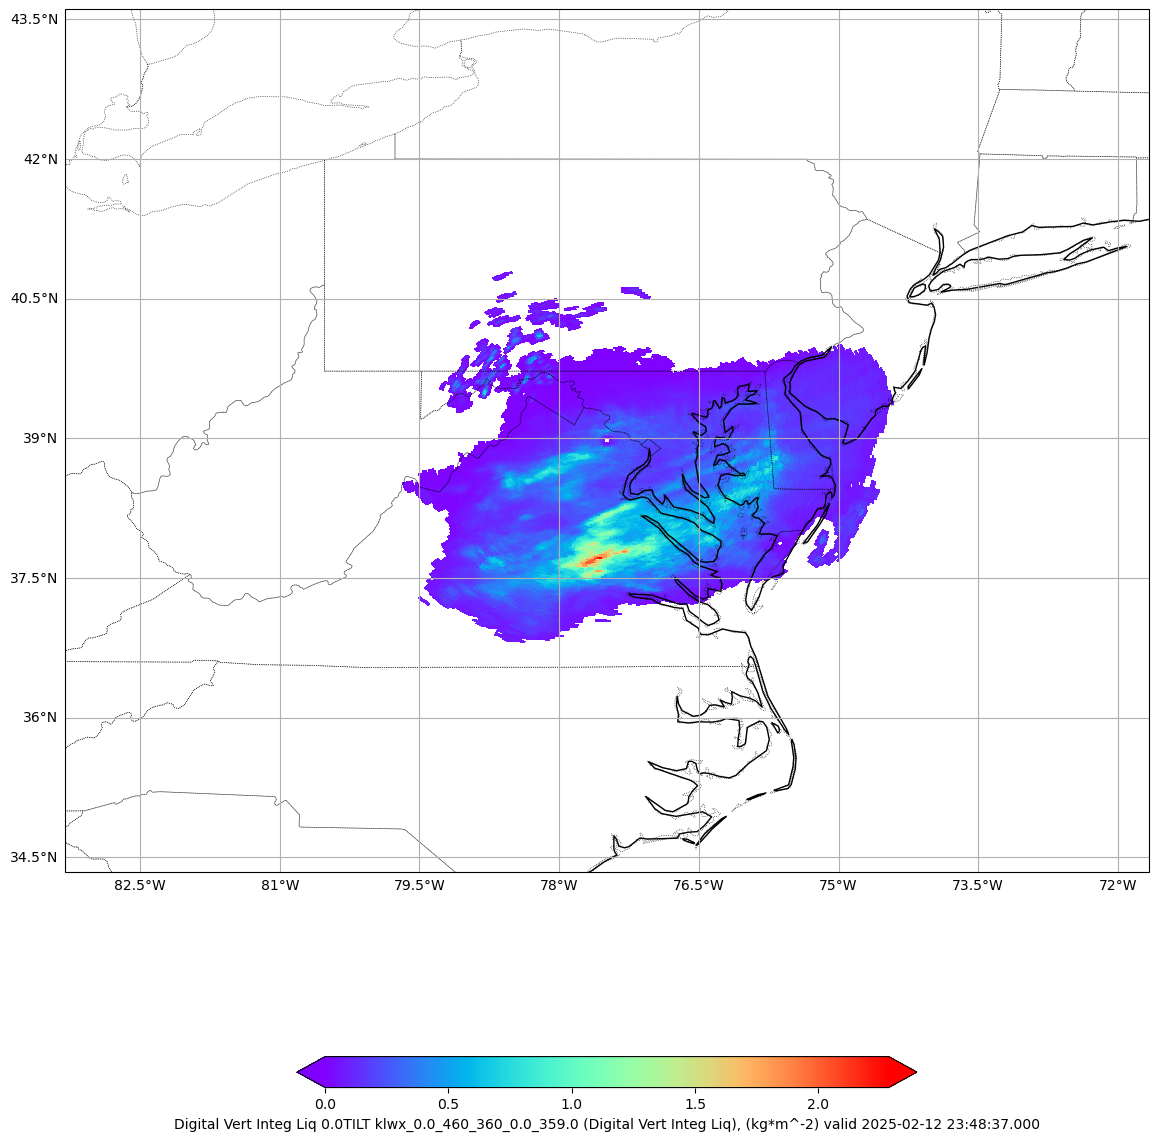


Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_346_360_0.0_359.0
Prod : Enhanced Echo Tops
Range: nan  to  nan  (Unit : m )
Size : (346, 360)



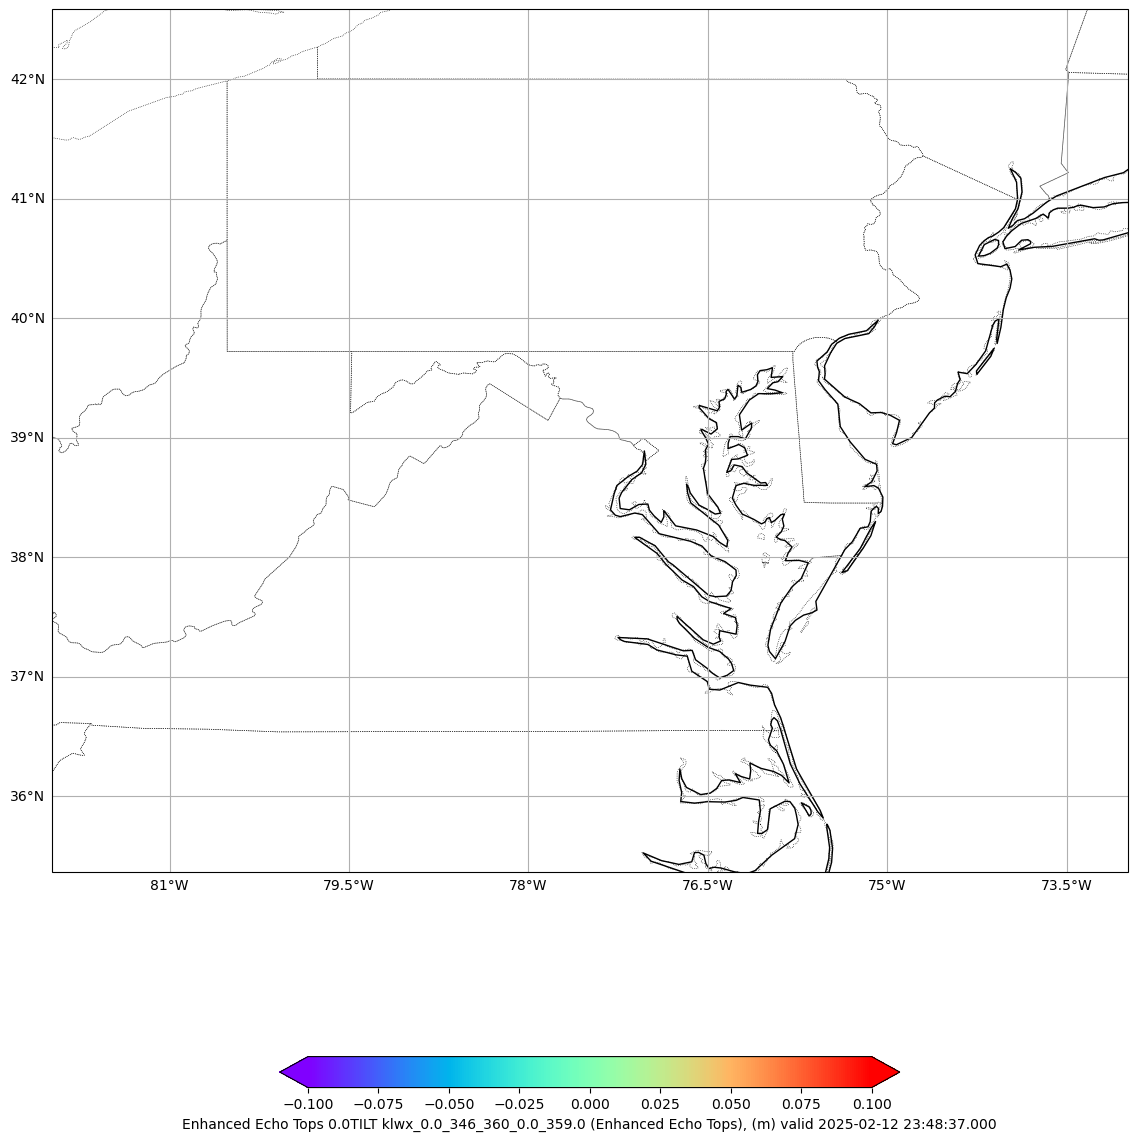


Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_920_360_0.0_359.0
Prod : Hybrid Hydrometeor Class
Range: 1.0  to  9.0  (Unit : count )
Size : (920, 360)



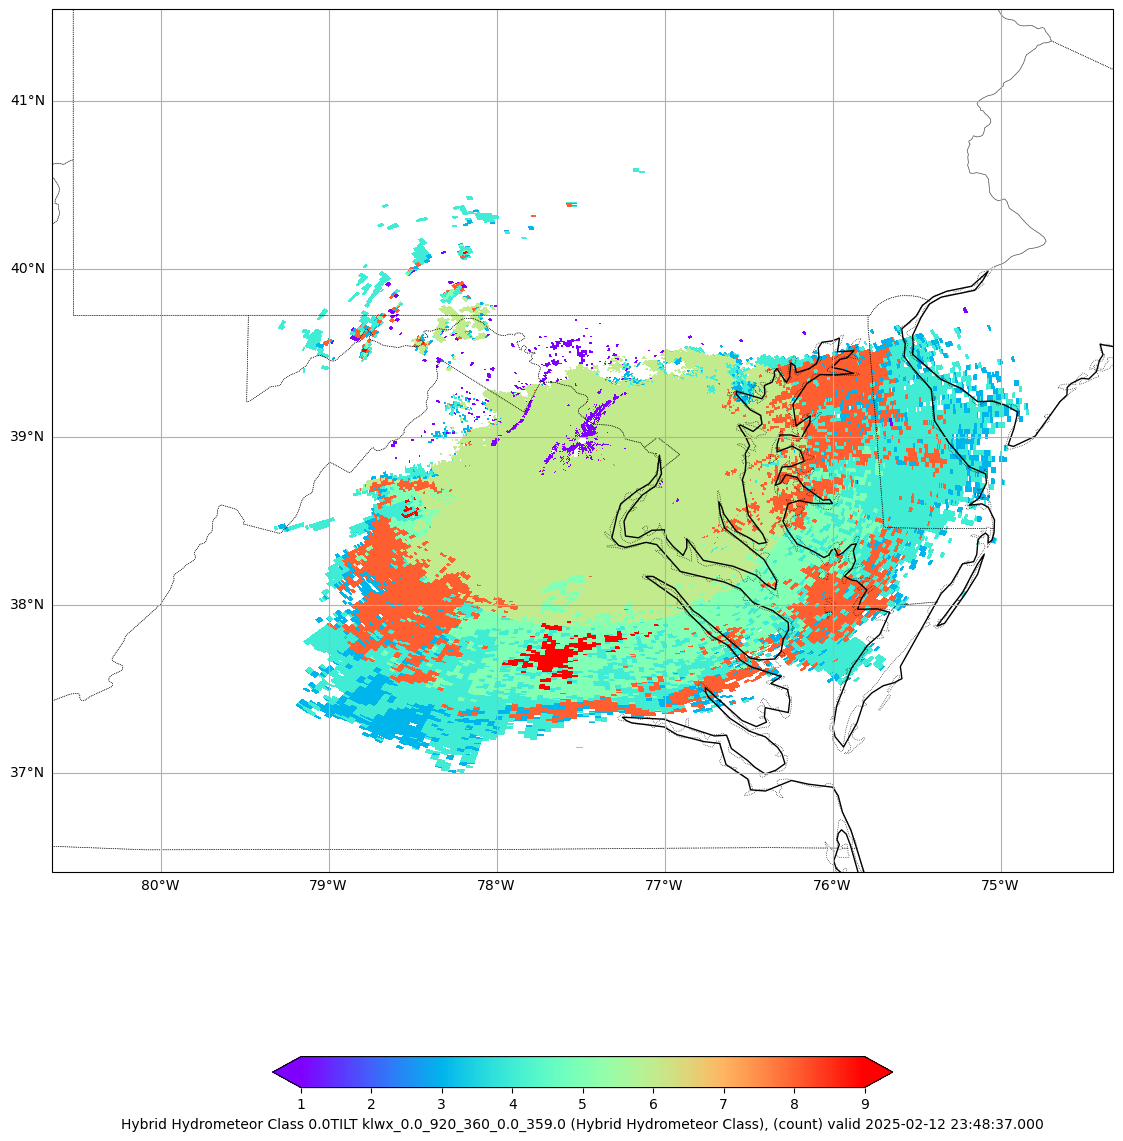

No levels found for Hydrometeor Class
No levels found for Melting Layer

Recs :  0

Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_115_360_359.0_359.0
Prod : One Hour Accum
Range: 0.0  to  0.00254  (Unit : m )
Size : (115, 360)



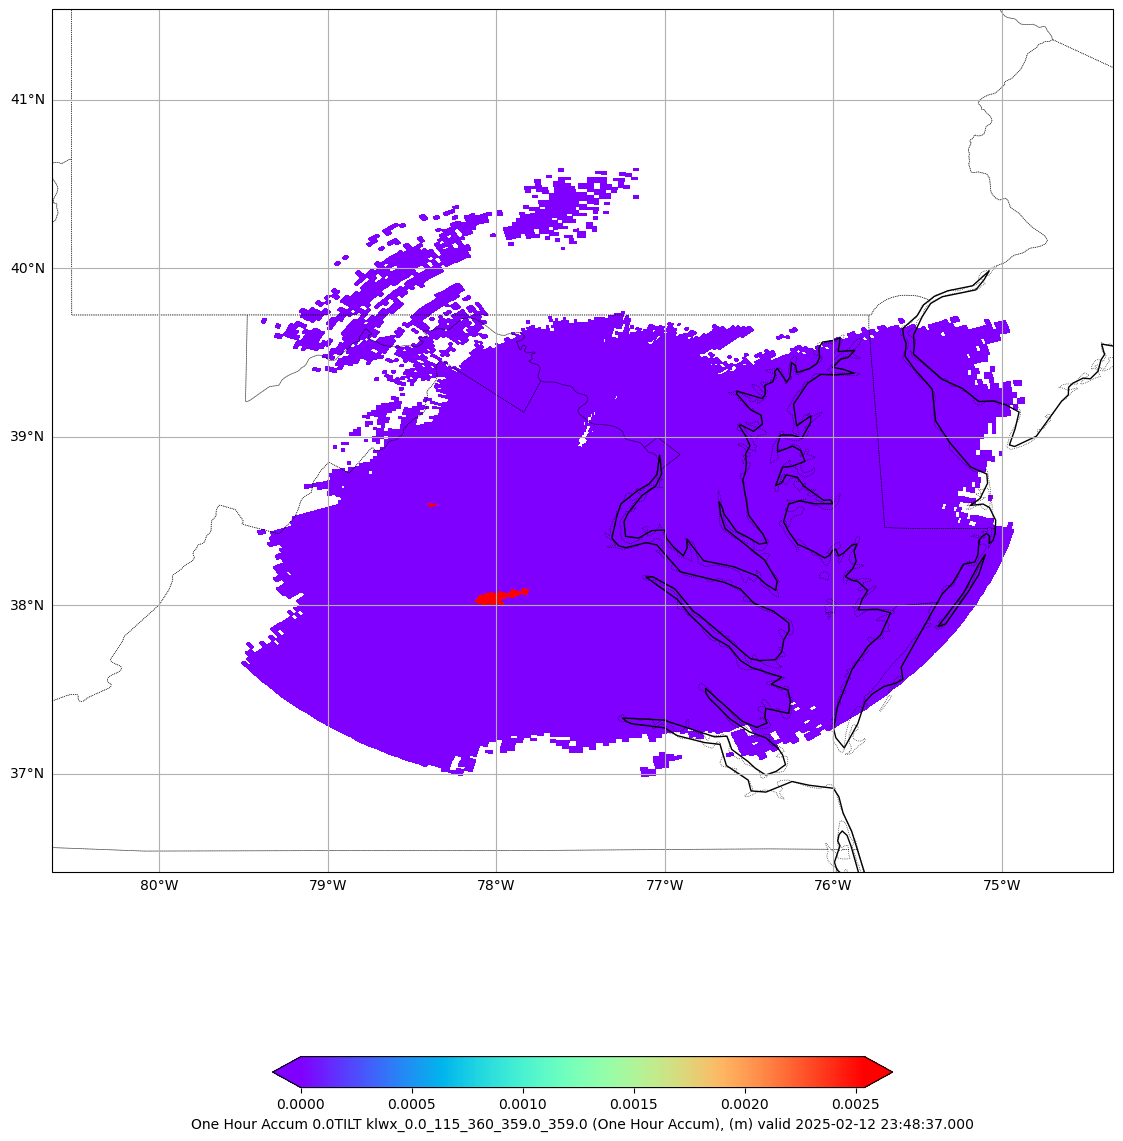


Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_920_360_0.0_359.0
Prod : One Hour Unbiased Accum
Range: 2.5482457e-05  to  0.0048997905  (Unit : m )
Size : (920, 360)



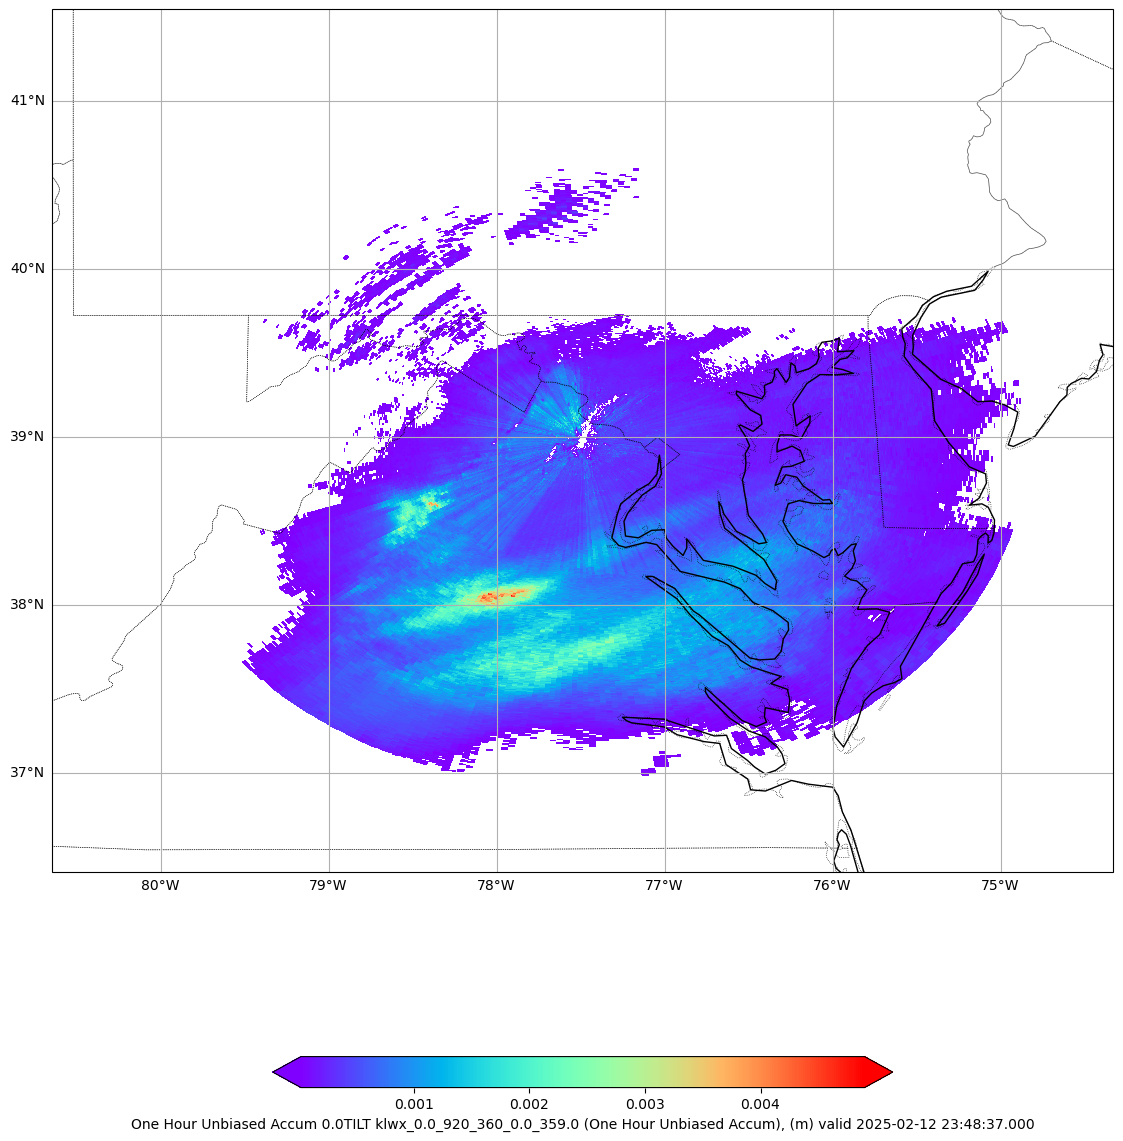


Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_920_360_0.0_359.0
Prod : Rain Rate Classification
Range: 3.0  to  10.0  (Unit : count )
Size : (920, 360)



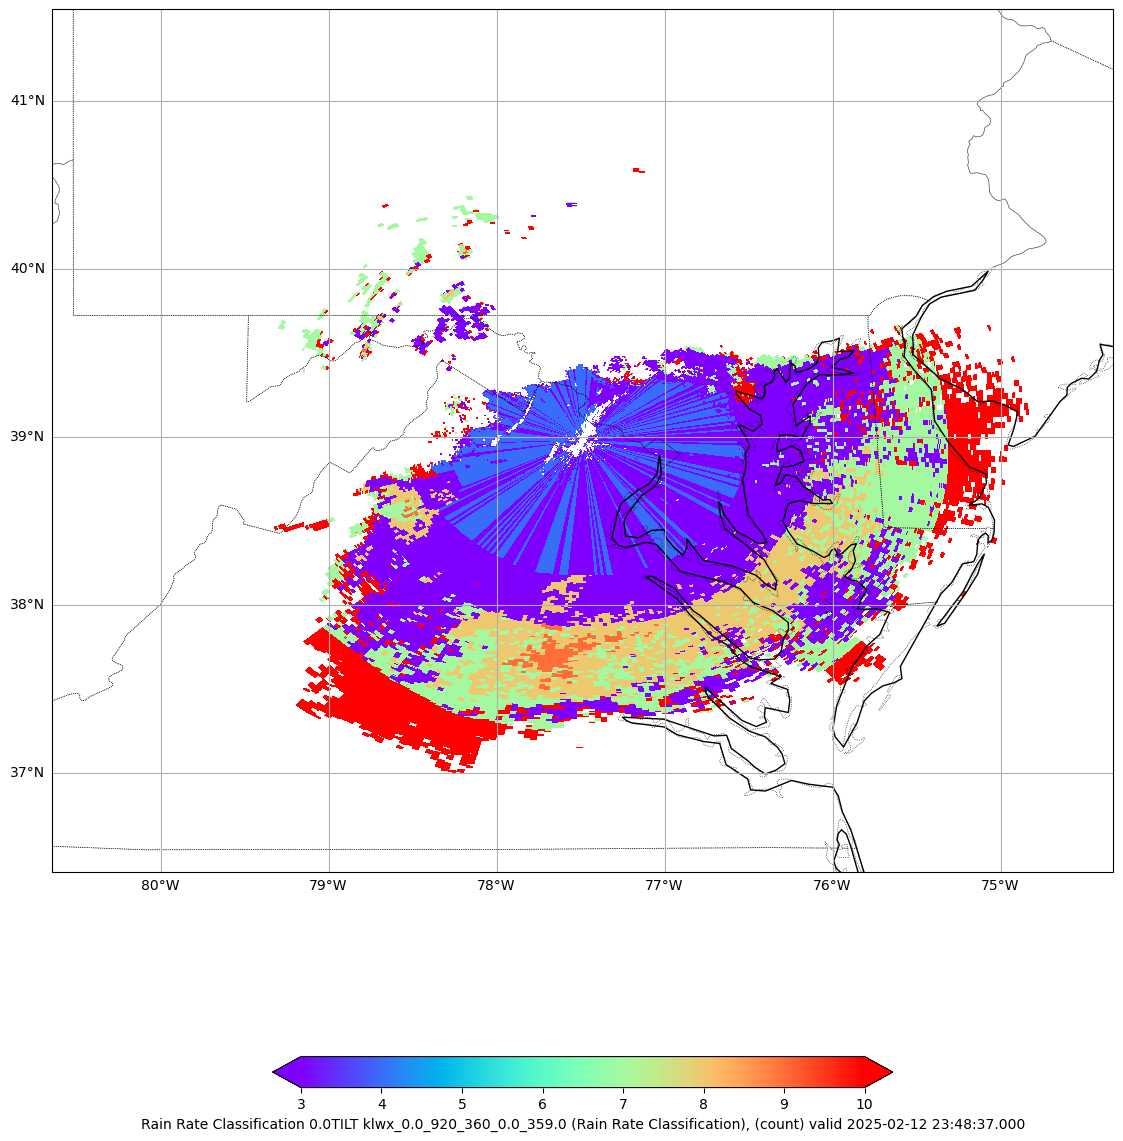

No levels found for Reflectivity
No levels found for Specific Diff Phase
No levels found for Storm Rel Velocity

Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_920_360_0.0_359.0
Prod : Storm Total Accum
Range: 0.000254  to  0.062484  (Unit : m )
Size : (920, 360)



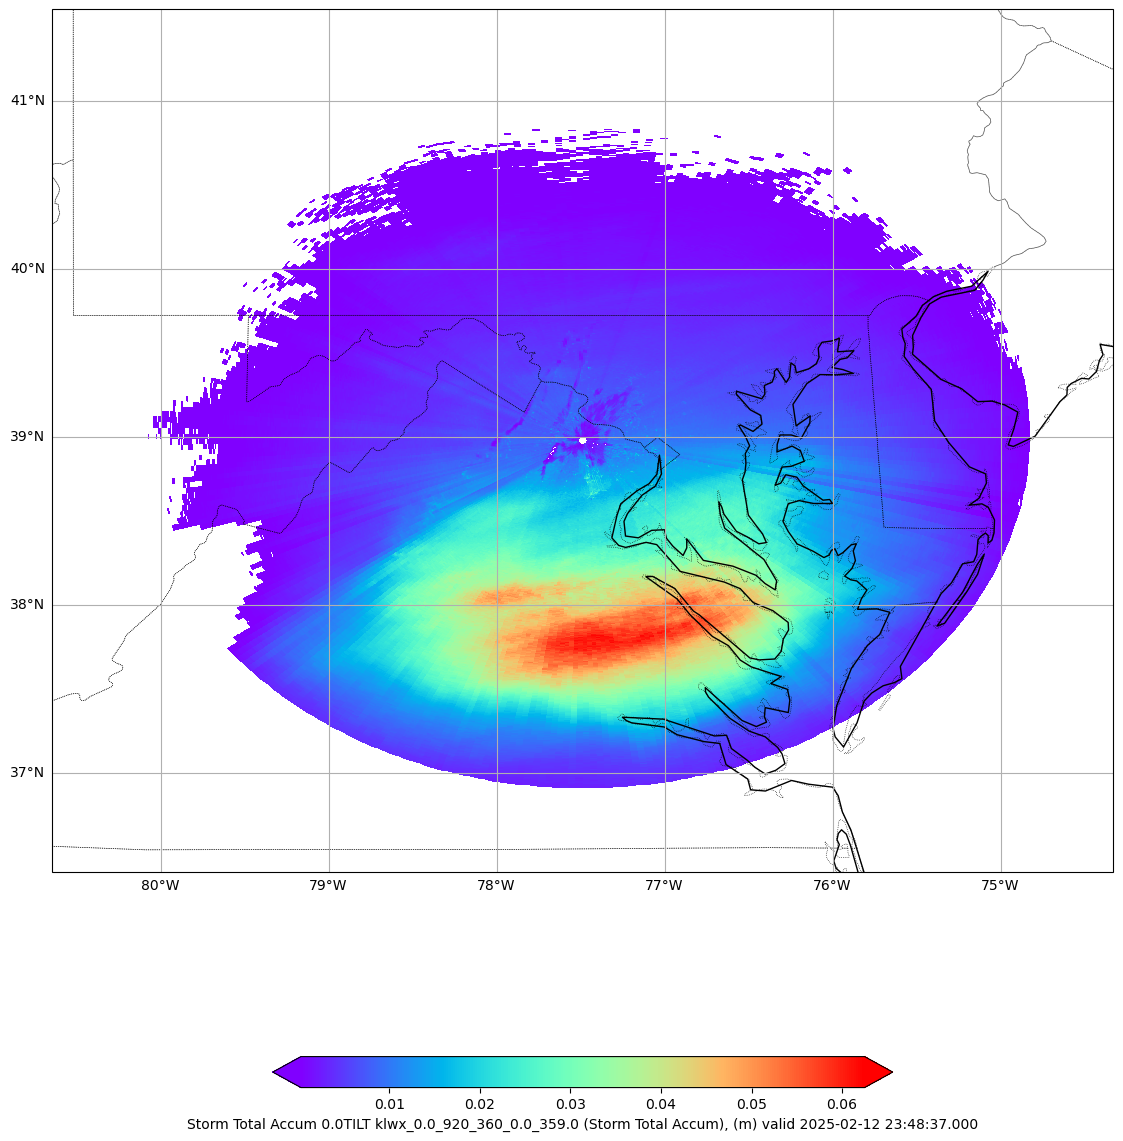


Recs :  0
No levels found for User Select Accum
No levels found for Velocity

Recs :  1
Time : 2025-02-12 23:48:37
Name : klwx_0.0_116_116
Prod : Vert Integ Liq
Range: 1.0  to  1.0  (Unit : kg*m^-2 )
Size : (116, 116)



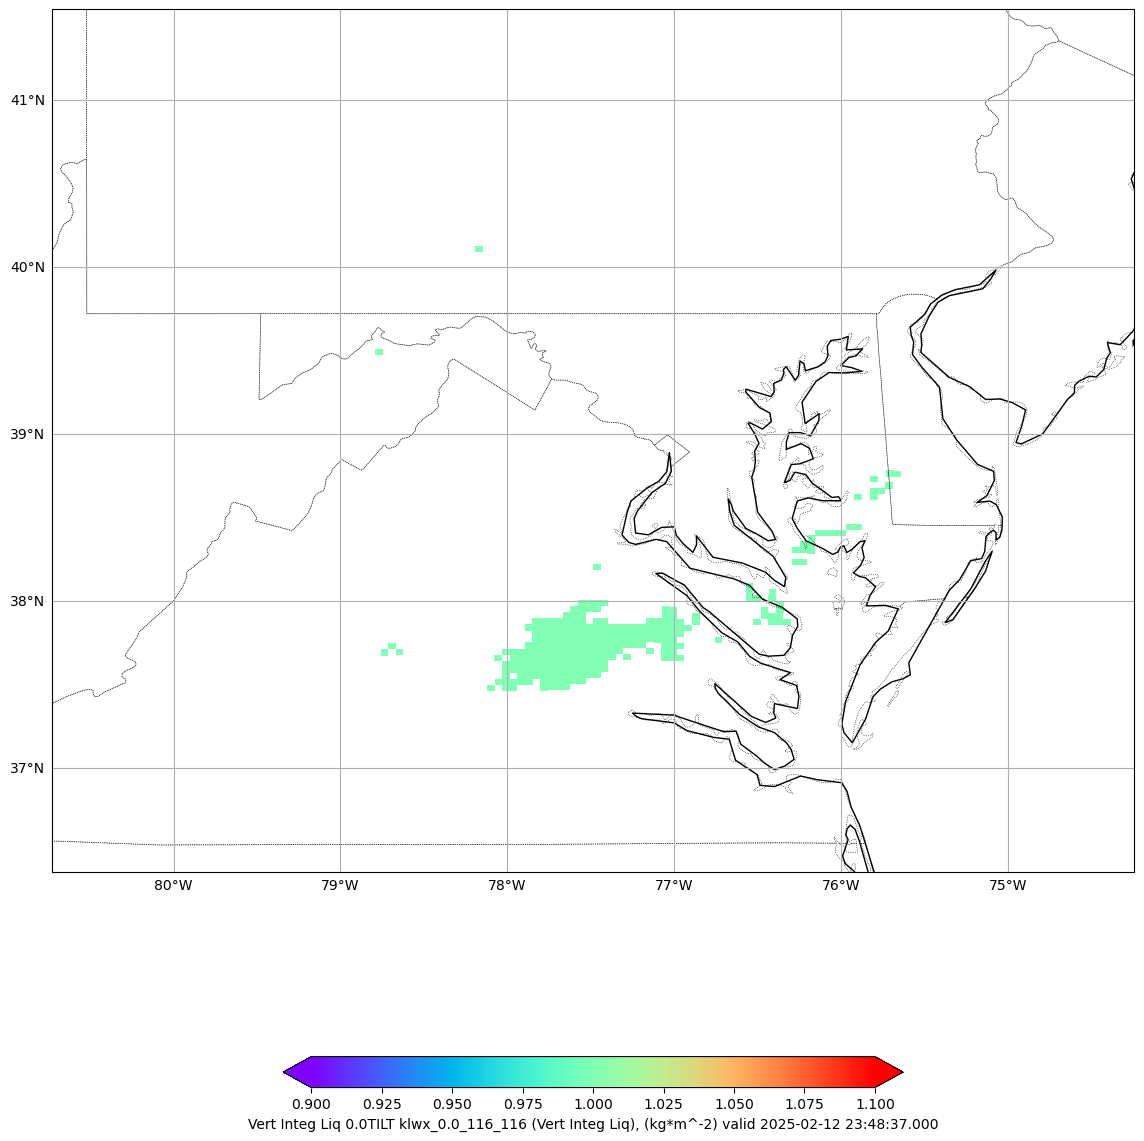

In [22]:
# suppress a few warnings that come from plotting
warnings.filterwarnings("ignore",category =RuntimeWarning)
warnings.filterwarnings("ignore",category =UserWarning)

# Cycle through all of the products to try and plot each one
for prod in productNames:
    
    request.setParameters(prod)
    availableLevels = DataAccessLayer.getAvailableLevels(request)
    
    # Check the available levels, if there are none, then skip this product
    if availableLevels:
        request.setLevels(availableLevels[0])
    else:
        print("No levels found for " + prod)
        continue

    cycles = DataAccessLayer.getAvailableTimes(request, True)
    times = DataAccessLayer.getAvailableTimes(request)

    if times:
        print()
        response = DataAccessLayer.getGridData(request, [times[-1]])
        print("Recs : ", len(response))
        
        if response:
            grid = response[0]
        else:
            continue
        data = grid.getRawData()
        lons, lats = grid.getLatLonCoords()
        
        print('Time :', str(grid.getDataTime()))
        flat = np.ndarray.flatten(data)
        print('Name :', str(grid.getLocationName()))
        print('Prod :', str(grid.getParameter()))
        print('Range:' , np.nanmin(flat), " to ", np.nanmax(flat), " (Unit :", grid.getUnit(), ")")
        print('Size :', str(data.shape))
        print()

        cmap = plt.get_cmap('rainbow')
        bbox = [lons.min()-0.5, lons.max()+0.5, lats.min()-0.5, lats.max()+0.5]
        fig, ax = make_map(bbox=bbox)
        cs = ax.pcolormesh(lons, lats, data, cmap=cmap)
        cbar = fig.colorbar(cs, extend='both', shrink=0.5, orientation='horizontal')
        cbar.set_label(grid.getParameter() +" " + grid.getLevel() + " " \
                       + grid.getLocationName() + " (" + prod + "), (" + grid.getUnit() + ") " \
                       + "valid " + str(grid.getDataTime().getRefTime()))
        plt.show()

<a href="#top">Top</a>

---

## See Also


### Related Notebooks

* [Grid Levels and Parameters](https://unidata.github.io/python-awips/examples/generated/Grid_Levels_and_Parameters.html)


### Additional Documention

**python-awips**

- [DataAccessLayer.changeEDEXHost()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.changeEDEXHost)
- [DataAccessLayer.newDataRequest()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.newDataRequest)
- [DataAccessLayer.getRadarProductIDs()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.getRadarProductIDs)
- [DataAccessLayer.getRadarProductNames()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.getRadarProductNames)

**matplotlib**

- [matplotlib.pyplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
- [matplotlib.pyplot.axes()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html)
- [matplotlib.pyplot.figure()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

<a href="#top">Top</a>

---